In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle
pd.set_option('display.max_columns', None)

In [2]:
data_dir = "/root/dataset_challenge/"

In [3]:
business_df = pd.read_csv(data_dir + "yelp_business.csv")
business_df.head()

business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars  review_count  is_open  \
0  33.330690 -111.978599    4.0            22        1   
1  40.291685  -80.104900    3.0            11        1   
2  33.524903 -112.115310    1.5            18        1   
3  33.383147 -111.964725    3.0             9        0   
4  41.119535  -81.475690    3.5           116        1   

                                          categories  
0  Dentists;General Dentistry;Health & Medical;Or...  
1  Hair Stylists;Hair Salons;Men's Hair Salons;Bl...  
2  Departments of Motor Vehicles;Public Services ...  
3                            Sporting Goods;Shopping  
4  American (New);Nightlife;Bars;Sandwiches;Ameri...

In [4]:
business_attrib_df = pd.read_csv(data_dir + "yelp_business_attributes.csv")[["business_id", "WheelchairAccessible", "BikeParking", "Alcohol", "RestaurantsAttire", "Music_background_music", "Music_live", "Ambience_romantic", "Ambience_intimate", "Ambience_classy", "Ambience_hipster", "Ambience_trendy", "Ambience_upscale", "RestaurantsGoodForGroups", "RestaurantsReservations", "HappyHour", "RestaurantsTableService", "GoodForMeal_dessert", "GoodForMeal_latenight", "GoodForMeal_lunch", "GoodForMeal_dinner", "GoodForMeal_breakfast", "GoodForMeal_brunch", "DogsAllowed", "DietaryRestrictions_dairy-free", "DietaryRestrictions_gluten-free", "DietaryRestrictions_vegan", "DietaryRestrictions_kosher", "DietaryRestrictions_halal", "DietaryRestrictions_soy-free", "DietaryRestrictions_vegetarian"]] 
business_attrib_df.head()

business_id WheelchairAccessible BikeParking Alcohol  \
0  FYWN1wneV18bWNgQjJ2GNg                   Na          Na      Na   
1  He-G7vWjzVUysIKrfNbPUQ                   Na        True      Na   
2  8DShNS-LuFqpEWIp0HxijA                   Na          Na    True   
3  PfOCPjBrlQAnz__NXj9h_w                   Na          Na      Na   
4  o9eMRCWt5PkpLDE0gOPtcQ                   Na       False      Na   

  RestaurantsAttire Music_background_music Music_live Ambience_romantic  \
0                Na                     Na         Na                Na   
1                Na                     Na         Na                Na   
2                Na                     Na         Na                Na   
3                Na                     Na         Na                Na   
4                Na                     Na         Na                Na   

  Ambience_intimate Ambience_classy Ambience_hipster Ambience_trendy  \
0                Na              Na               Na              Na   
1                Na              Na               Na              Na   
2                Na              Na               Na              Na   
3                Na              Na               Na              Na   
4                Na              Na               Na              Na   

  Ambience_upscale RestaurantsGoodForGroups RestaurantsReservations HappyHour  \
0               Na                       Na                      Na        Na   
1               Na                       Na                      Na        Na   
2               Na                       Na                      Na        Na   
3               Na                       Na                      Na        Na   
4               Na                       Na                      Na        Na   

  RestaurantsTableService GoodForMeal_dessert GoodForMeal_latenight  \
0                      Na                  Na                    Na   
1                      Na                  Na                    Na   
2                      Na                  Na                    Na   
3                      Na                  Na                    Na   
4                      Na                  Na                    Na   

  GoodForMeal_lunch GoodForMeal_dinner GoodForMeal_breakfast  \
0                Na                 Na                    Na   
1                Na                 Na                    Na   
2                Na                 Na                    Na   
3                Na                 Na                    Na   
4                Na                 Na                    Na   

  GoodForMeal_brunch DogsAllowed DietaryRestrictions_dairy-free  \
0                 Na          Na                             Na   
1                 Na          Na                             Na   
2                 Na          Na                             Na   
3                 Na       False                             Na   
4                 Na          Na                             Na   

  DietaryRestrictions_gluten-free DietaryRestrictions_vegan  \
0                              Na                        Na   
1                              Na                        Na   
2                              Na                        Na   
3                              Na                        Na   
4                              Na                        Na   

  DietaryRestrictions_kosher DietaryRestrictions_halal  \
0                         Na                        Na   
1                         Na                        Na   
2                         Na                        Na   
3                         Na                        Na   
4                         Na                        Na   

  DietaryRestrictions_soy-free DietaryRestrictions_vegetarian  
0                           Na                             Na  
1                           Na                             Na  
2                           Na                             Na  
3                      

In [5]:
business_df = business_df[business_df['categories'].str.contains("Restaurants", case=False, na=False)][["business_id", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count"]]

In [6]:
business_df.rename({'stars': 'business_avg_stars', "review_count": "business_review_count"}, axis=1, inplace=True)
business_df.head()

business_id            city state postal_code   latitude  \
4   PfOCPjBrlQAnz__NXj9h_w  Cuyahoga Falls    OH       44221  41.119535   
5   o9eMRCWt5PkpLDE0gOPtcQ       Stuttgart    BW       70567  48.727200   
10  XOSRcvtaKc_Q5H1SAzN20A         Houston    PA       15342  40.241548   
14  fNMVV_ZX7CJSDWQGdOM8Nw       Charlotte    NC       28202  35.221647   
15  l09JfMeQ6ynYs5MCJtrcmQ         Toronto    ON     M4P 2H6  43.711399   

    longitude  business_avg_stars  business_review_count  
4  -81.475690                 3.5                    116  
5    9.147950                 4.0                      5  
10 -80.212815                 4.5                      3  
14 -80.839345                 3.5                      7  
15 -79.399339                 3.0                     12

In [7]:
biz_hours_df = pd.read_csv(data_dir + "yelp_business_hours.csv")
biz_hours_df.head()

business_id     monday    tuesday  wednesday   thursday  \
0  FYWN1wneV18bWNgQjJ2GNg  7:30-17:0  7:30-17:0  7:30-17:0  7:30-17:0   
1  He-G7vWjzVUysIKrfNbPUQ   9:0-20:0   9:0-20:0   9:0-20:0   9:0-20:0   
2  KQPW8lFf1y5BT2MxiSZ3QA        NaN        NaN        NaN        NaN   
3  8DShNS-LuFqpEWIp0HxijA  10:0-21:0  10:0-21:0  10:0-21:0  10:0-21:0   
4  PfOCPjBrlQAnz__NXj9h_w   11:0-1:0   11:0-1:0   11:0-1:0   11:0-1:0   

      friday   saturday     sunday  
0  7:30-17:0        NaN        NaN  
1   9:0-16:0   8:0-16:0        NaN  
2        NaN        NaN        NaN  
3  10:0-21:0  10:0-21:0  11:0-19:0  
4   11:0-1:0   11:0-2:0   11:0-0:0

In [8]:
checkin_df = pd.read_csv(data_dir + "yelp_checkin.csv")
checkin_df.head()

business_id weekday   hour  checkins
0  3Mc-LxcqeguOXOVT_2ZtCg     Tue   0:00        12
1  SVFx6_epO22bZTZnKwlX7g     Wed   0:00         4
2  vW9aLivd4-IorAfStzsHww     Tue  14:00         1
3  tEzxhauTQddACyqdJ0OPEQ     Fri  19:00         1
4  CEyZU32P-vtMhgqRCaXzMA     Tue  17:00         1

In [9]:
review_df = pd.read_csv(data_dir + "yelp_review.csv")
review_df.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars        date                                               text  \
0      5  2016-05-28  Super simple place but amazing nonetheless. It...   
1      5  2016-05-28  Small unassuming place that changes their menu...   
2      5  2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4  2016-05-28  Love coming here. Yes the place always needs t...   
4      4  2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  
0       0      0     0  
1       0      0     0  
2       0      0     0  
3       0      0     0  
4       0      0     0

In [10]:
review_df["useful"].unique()

array([   0,    1,    3,    5,    9,    2,    4,    8,   11,    6,   15,
          7,   10,   22,   14,   19,   25,   12,   13,   16,   26,   20,
         18,   27,   17,   23,   24,   21,   47,   33,   35,   28,   30,
         32,   37,   49,   31,   95,   34,   38,   40,   54,   43,   44,
         68,   41,   59,   53,   39,   45,   56,   52,   42,   71,   74,
         36,   29,   58,   86,   46,  187,   62,   51,   90,   99,   97,
         91,   92,  110,   89,   83, 1456,  500,  120,  250,   76,  638,
         50,   93,   67,  276,   57,   48,  127,   80,   72,   63,  967,
        218,  179,  200,  222,  203,  219,  226,  217,  216,  215,  221,
        212,  246,  197,  201,  228,  164,  193,  181,  194,  209,  243,
        192,  233,  207,  117,  777,  185,  105,   87,  271,  184,   65,
        103,   79,   66,  134,  132,  141,  100,  283,   60,   78,   55,
         84,  111,   70,  416,  168,   73,   61,   77,  312,  463,   69,
        180,  189,  412,  118,  135,  109,  204,  1

In [11]:
tip_df = pd.read_csv(data_dir + "yelp_tip.csv")
tip_df.head()

text        date  likes  \
0  Great breakfast large portions and friendly wa...  2015-08-12      0   
1  Nice place. Great staff.  A fixture in the tow...  2014-06-20      0   
2                     Happy hour 5-7 Monday - Friday  2016-10-12      0   
3  Parking is a premium, keep circling, you will ...  2017-01-28      0   
4             Homemade pasta is the best in the area  2017-02-25      0   

              business_id                 user_id  
0  jH19V2I9fIslnNhDzPmdkA  ZcLKXikTHYOnYt5VYRO5sg  
1  dAa0hB2yrnHzVmsCkN4YvQ  oaYhjqBbh18ZhU0bpyzSuw  
2  dAa0hB2yrnHzVmsCkN4YvQ  ulQ8Nyj7jCUR8M83SUMoRQ  
3  ESzO3Av0b1_TzKOiqzbQYQ  ulQ8Nyj7jCUR8M83SUMoRQ  
4  k7WRPbDd7rztjHcGGkEjlw  ulQ8Nyj7jCUR8M83SUMoRQ

In [12]:
user_df = pd.read_csv(data_dir + "yelp_user.csv")[["user_id", "review_count", "yelping_since", "average_stars"]]
user_df.rename({'average_stars': 'user_average_stars', "review_count": "user_review_count"}, inplace=True, axis=1)
user_df.head()

user_id  user_review_count yelping_since  user_average_stars
0  JJ-aSuM4pCFPdkfoZ34q0Q                 10    2013-09-24                3.70
1  uUzsFQn_6cXDh6rPNGbIFA                  1    2017-03-02                2.00
2  mBneaEEH5EMyxaVyqS-72A                  6    2015-03-13                4.67
3  W5mJGs-dcDWRGEhAzUYtoA                  3    2016-09-08                4.67
4  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16                3.45

In [13]:
merged_df = user_df.merge(review_df, how="inner", on="user_id")

In [14]:
merged_df = merged_df.merge(business_df, how='inner', on='business_id')

In [15]:
merged_df.head()

user_id  user_review_count yelping_since  \
0  uUzsFQn_6cXDh6rPNGbIFA                  1    2017-03-02   
1  mBneaEEH5EMyxaVyqS-72A                  6    2015-03-13   
2  W5mJGs-dcDWRGEhAzUYtoA                  3    2016-09-08   
3  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16   
4  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16   

   user_average_stars               review_id             business_id  stars  \
0                2.00  wUiZNdOmQ-QmkcyMInVcHw  eLFfWcdb7VkqNyTONksHiQ      2   
1                4.67  NcsYfWE4QxZgMQMMIoHqaQ  yT-ASP05C0yQ0hJBaYCYcg      4   
2                4.67  gGghNe3sGyxZdwCVdZ_njQ  gGt00WW8sNY2Sop7jYa7Tw      4   
3                3.45  c3WHyv3zX3iZLXkznxIpxQ  SGZAsdQAp0SjtMDjXWBPYw      3   
4                3.45  UP2K5EJYYChSw48Pjm3FBw  7sN4uA7jPakOKerNEQ2Mdg      1   

         date                                               text  useful  \
0  2017-03-02  I went last night to celebrate my boyfriend's ...       0   
1  2015-03-13  My wife and I regularly hit up Ah-So for Happy...       0   
2  2017-07-28  Good service, good food.  The queso was great ...       0   
3  2013-06-08  We came in for dinner based on the yelp (and s...       0   
4  2012-07-22  If I could give you a 0, I would. I called and...       3   

   funny  cool         city state postal_code   latitude   longitude  \
0      0     0    Henderson    NV       89014  36.066776 -115.042471   
1      0     0     Goodyear    AZ       85395  33.462856 -112.391772   
2      0     0    Charlotte    NC       28203  35.202035  -80.844459   
3      1     0    Cleveland    OH       44113  41.488915  -81.709046   
4      2     0  Valley City    OH       44280  41.237658  -81.930948   

   business_avg_stars  business_review_count  
0                 4.0                   1652  
1                 3.0                    140  
2                 4.0                    325  
3                 4.0                    138  
4                 3.0                     16

In [16]:
thin_df = merged_df[['user_id', 'user_review_count']]

/tmp/ipykernel_11724/1087313096.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thin_df['review_bin'] = pd.cut(thin_df['user_review_count'], bins=bins, labels=labels, right=False)


review_bin
0-4       453124
5-9       857731
10-14    1143238
15-19    1359277
20-24    1521928
25-29    1650450
30-34    1757266
35-39    1846267
40-44    1923152
45-49    1991007
Name: count, dtype: int64


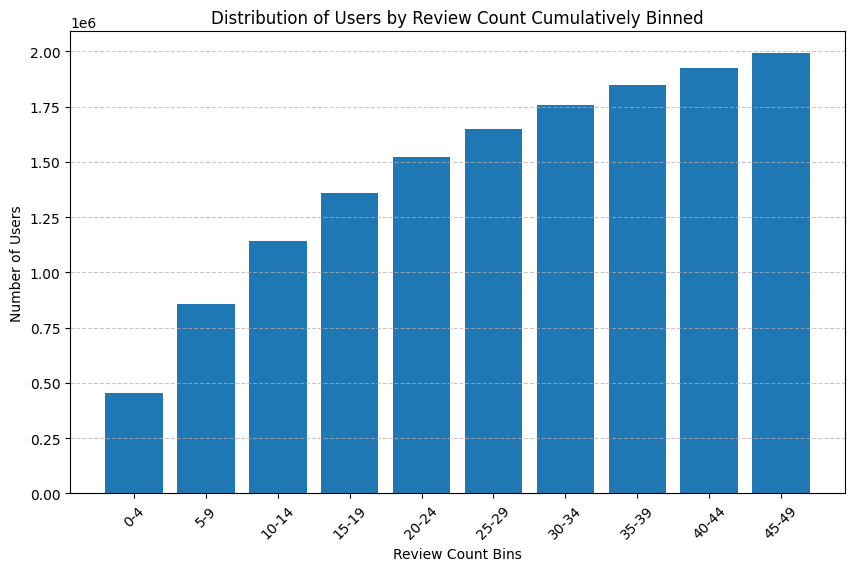

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins for review_count
bins = np.arange(0, 55, 5)  # Bins from 0 to 50 in steps of 5
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Bin the data
thin_df['review_bin'] = pd.cut(thin_df['user_review_count'], bins=bins, labels=labels, right=False)

# Count the number of users per bin
bin_counts = thin_df['review_bin'].value_counts().sort_index()
bin_counts = bin_counts.cumsum()

print(bin_counts)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel("Review Count Bins")
plt.ylabel("Number of Users")
plt.title("Distribution of Users by Review Count Cumulatively Binned")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

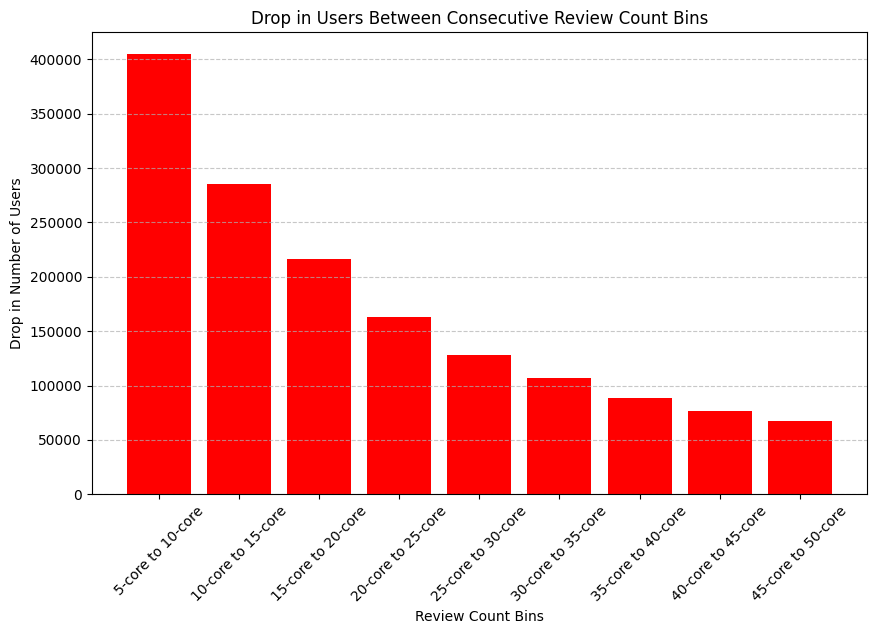

In [18]:
# Calculate the drop in user count between consecutive bins
bin_drops = bin_counts.diff().dropna()

bin_diff_labels = ["5-core to 10-core", "10-core to 15-core", "15-core to 20-core", "20-core to 25-core", "25-core to 30-core", "30-core to 35-core", "35-core to 40-core", "40-core to 45-core", "45-core to 50-core"]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_diff_labels, bin_drops.values, color='red')
plt.xlabel("Review Count Bins")
plt.ylabel("Drop in Number of Users")
plt.title("Drop in Users Between Consecutive Review Count Bins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
# Filter Users with less than 10 reviews:
merged_df = merged_df[merged_df["user_review_count"]>=5]

In [20]:
thin_df = merged_df[['business_id', 'business_review_count']]

/tmp/ipykernel_11724/3789166886.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thin_df['review_bin'] = pd.cut(thin_df['business_review_count'], bins=bins, labels=labels, right=False)


review_bin
0-4       21993
5-9       77649
10-14    134453
15-19    191018
20-24    245853
25-29    300543
30-34    351658
35-39    399590
40-44    447180
45-49    495720
Name: count, dtype: int64


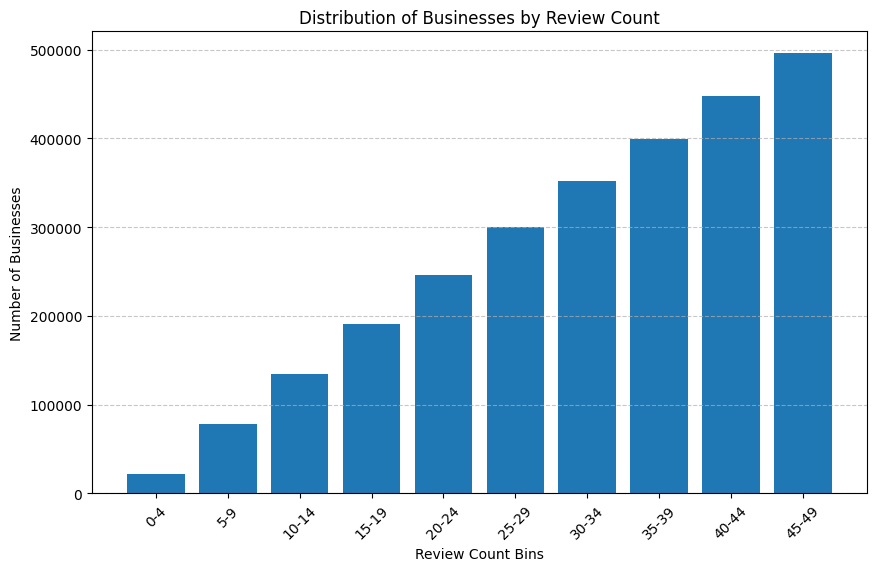

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define bins for review_count
bins = np.arange(0, 55, 5)  # Bins from 0 to 50 in steps of 5
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

# Bin the data
thin_df['review_bin'] = pd.cut(thin_df['business_review_count'], bins=bins, labels=labels, right=False)

# Count the number of users per bin
bin_counts = thin_df['review_bin'].value_counts().sort_index()
bin_counts = bin_counts.cumsum()

print(bin_counts)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_counts.index, bin_counts.values)
plt.xlabel("Review Count Bins")
plt.ylabel("Number of Businesses")
plt.title("Distribution of Businesses by Review Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

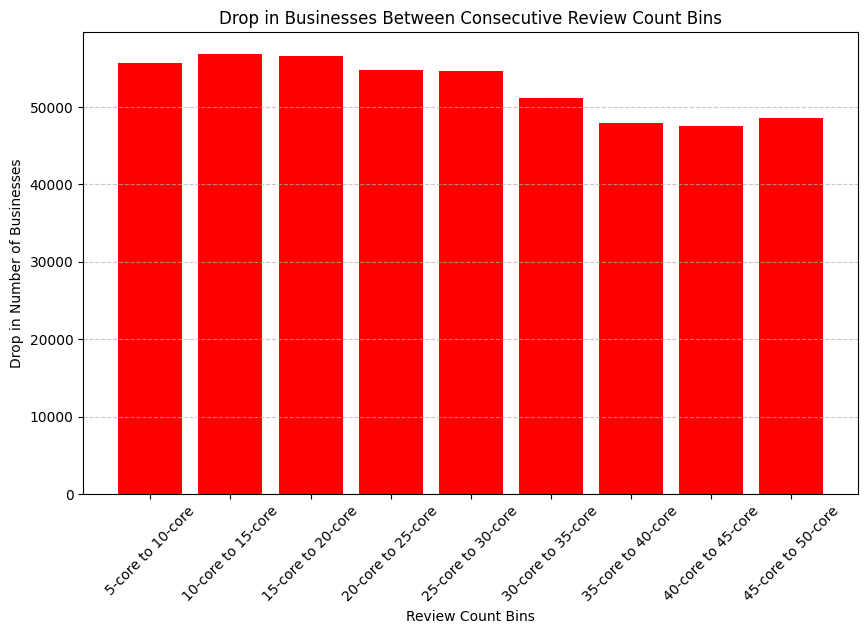

In [22]:
# Calculate the drop in user count between consecutive bins
bin_drops = bin_counts.diff().dropna()

bin_diff_labels = ["5-core to 10-core", "10-core to 15-core", "15-core to 20-core", "20-core to 25-core", "25-core to 30-core", "30-core to 35-core", "35-core to 40-core", "40-core to 45-core", "45-core to 50-core"]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(bin_diff_labels, bin_drops.values, color='red')
plt.xlabel("Review Count Bins")
plt.ylabel("Drop in Number of Businesses")
plt.title("Drop in Businesses Between Consecutive Review Count Bins")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Filter Business with less than 10
merged_df = merged_df[merged_df["business_review_count"]>=10]

In [24]:
merged_df = merged_df.merge(business_attrib_df, how='inner', on='business_id')

In [25]:
merged_df.columns

Index(['user_id', 'user_review_count', 'yelping_since', 'user_average_stars',
       'review_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny',
       'cool', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'business_avg_stars', 'business_review_count', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'RestaurantsAttire', 'Music_background_music',
       'Music_live', 'Ambience_romantic', 'Ambience_intimate',
       'Ambience_classy', 'Ambience_hipster', 'Ambience_trendy',
       'Ambience_upscale', 'RestaurantsGoodForGroups',
       'RestaurantsReservations', 'HappyHour', 'RestaurantsTableService',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'DogsAllowed', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'Die

In [26]:
merged_df.head()

user_id  user_review_count yelping_since  \
0  mBneaEEH5EMyxaVyqS-72A                  6    2015-03-13   
1  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16   
2  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16   
3  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16   
4  4E8--zUZO1Rr1IBK4_83fg                 11    2012-07-16   

   user_average_stars               review_id             business_id  stars  \
0                4.67  NcsYfWE4QxZgMQMMIoHqaQ  yT-ASP05C0yQ0hJBaYCYcg      4   
1                3.45  c3WHyv3zX3iZLXkznxIpxQ  SGZAsdQAp0SjtMDjXWBPYw      3   
2                3.45  UP2K5EJYYChSw48Pjm3FBw  7sN4uA7jPakOKerNEQ2Mdg      1   
3                3.45  cYKLqMKGmo9VwrZcF2WmEA  9QiUKGLa4tJlQrV-LiPIbw      5   
4                3.45  BQSfk_qqH-dXq2ltJddXvg  IfdwBSEuDK3fKvVHVX9k0A      3   

         date                                               text  useful  \
0  2015-03-13  My wife and I regularly hit up Ah-So for Happy...       0   
1  2013-06-08  We came in for dinner based on the yelp (and s...       0   
2  2012-07-22  If I could give you a 0, I would. I called and...       3   
3  2012-11-15  we made a reservation for saturday night at 83...       5   
4  2012-07-22  Had lunch here with my bf and his friend.  We ...       2   

   funny  cool          city state postal_code   latitude   longitude  \
0      0     0      Goodyear    AZ       85395  33.462856 -112.391772   
1      1     0     Cleveland    OH       44113  41.488915  -81.709046   
2      2     0   Valley City    OH       44280  41.237658  -81.930948   
3      0     0  Strongsville    OH       44136  41.313731  -81.816986   
4      0     0         Berea    OH       44017  41.373883  -81.891878   

   business_avg_stars  business_review_count WheelchairAccessible BikeParking  \
0                 3.0                    140                   Na          Na   
1                 4.0                    138                   Na        True   
2                 3.0                     16                   Na          Na   
3                 3.5                    125                 True          Na   
4                 3.5                    211                   Na       False   

  Alcohol RestaurantsAttire Music_background_music Music_live  \
0      Na                Na                     Na         Na   
1      Na                Na                     Na         Na   
2      Na                Na                     Na         Na   
3      Na                Na                     Na         Na   
4      Na                Na                     Na         Na   

  Ambience_romantic Ambience_intimate Ambience_classy Ambience_hipster  \
0                Na                Na              Na               Na   
1                Na                Na              Na               Na   
2                Na                Na              Na               Na   
3                Na                Na              Na               Na   
4                Na                Na              Na               Na   

  Ambience_trendy Ambience_upscale RestaurantsGoodForGroups  \
0              Na               Na                       Na   
1              Na               Na                       Na   
2              Na               Na                       Na   
3              Na               Na                       Na   
4              Na               Na                       Na   

  RestaurantsReservations HappyHour RestaurantsTableService  \
0                      Na        Na                      Na   
1                      Na        Na                      Na   
2                      Na        Na                      Na   
3                      Na        Na                      Na   
4                      Na        Na                      Na   

  GoodForMeal_dessert GoodForMeal_latenight GoodForMeal_lunch  \
0                  Na                 False             False   
1                  Na                    Na              

In [27]:
int_types = ['user_review_count', 'stars', 'useful', 'funny', 'business_review_count']
long_types = []

In [28]:
float_types = ['user_average_stars', 'latitude', 'longitude', 'business_avg_stars']

In [29]:
string_types = ['text', 'date', 'yelping_since', 'postal_code']

In [30]:
categorical_types = set(merged_df.columns).difference(set(int_types)).difference(set(float_types)).difference(set(string_types)).difference(set(long_types))

In [31]:
categorical_types

{'Alcohol',
 'Ambience_classy',
 'Ambience_hipster',
 'Ambience_intimate',
 'Ambience_romantic',
 'Ambience_trendy',
 'Ambience_upscale',
 'BikeParking',
 'DietaryRestrictions_dairy-free',
 'DietaryRestrictions_gluten-free',
 'DietaryRestrictions_halal',
 'DietaryRestrictions_kosher',
 'DietaryRestrictions_soy-free',
 'DietaryRestrictions_vegan',
 'DietaryRestrictions_vegetarian',
 'DogsAllowed',
 'GoodForMeal_breakfast',
 'GoodForMeal_brunch',
 'GoodForMeal_dessert',
 'GoodForMeal_dinner',
 'GoodForMeal_latenight',
 'GoodForMeal_lunch',
 'HappyHour',
 'Music_background_music',
 'Music_live',
 'RestaurantsAttire',
 'RestaurantsGoodForGroups',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'WheelchairAccessible',
 'business_id',
 'city',
 'cool',
 'review_id',
 'state',
 'user_id'}

In [32]:
from collections import ChainMap
int_types_map = {k: 'int' for k in int_types}
float_types_map = {k: 'float' for k in float_types}
string_types_map = {k: 'string' for k in string_types}
categorical_types_map = {k: 'category' for k in categorical_types}
long_types_map = {k: 'uint64' for k in long_types}
lst_mappings = [int_types_map, float_types_map, string_types_map, categorical_types_map, long_types_map]
dtypes_map = dict(ChainMap(*lst_mappings))
dtypes_map

{'Ambience_romantic': 'category',
 'RestaurantsAttire': 'category',
 'state': 'category',
 'DietaryRestrictions_kosher': 'category',
 'HappyHour': 'category',
 'Ambience_trendy': 'category',
 'DietaryRestrictions_dairy-free': 'category',
 'RestaurantsGoodForGroups': 'category',
 'GoodForMeal_dinner': 'category',
 'Music_live': 'category',
 'cool': 'category',
 'DietaryRestrictions_gluten-free': 'category',
 'GoodForMeal_dessert': 'category',
 'Ambience_intimate': 'category',
 'GoodForMeal_latenight': 'category',
 'Ambience_upscale': 'category',
 'review_id': 'category',
 'GoodForMeal_brunch': 'category',
 'DogsAllowed': 'category',
 'Alcohol': 'category',
 'WheelchairAccessible': 'category',
 'DietaryRestrictions_vegetarian': 'category',
 'DietaryRestrictions_soy-free': 'category',
 'DietaryRestrictions_halal': 'category',
 'DietaryRestrictions_vegan': 'category',
 'city': 'category',
 'RestaurantsTableService': 'category',
 'GoodForMeal_lunch': 'category',
 'Ambience_classy': 'categor

In [33]:
def binarize_bool(cell):
    if cell is True:
        return 1
    elif cell is False:
        return 0
    else:
        return cell

# Handle NAs for int types
for col in int_types:
    merged_df[col] = merged_df[col].fillna(0) # if NA, we set it to 0


# Handle NAs for float types:
merged_df['user_average_stars'] = merged_df['user_average_stars'].fillna(0.0)
merged_df['business_avg_stars'] = merged_df['business_avg_stars'].fillna(0.0)
merged_df['latitude'] = merged_df['latitude'].dropna()
merged_df['longitude'] = merged_df['longitude'].dropna()

# Handle NAs for long
for col in long_types:
    merged_df[col] = merged_df[col].fillna(0) # if NA, we set it to 0

# Handle NAs for str
merged_df['text'] = merged_df['text'].fillna('')
merged_df['date'] = merged_df['date'].dropna()
merged_df['yelping_since'] = merged_df['yelping_since'].dropna()
merged_df['postal_code'] = merged_df['postal_code'].fillna('')

cols_to_drop = []

# Handle NAs for categorical types:
for col in categorical_types:
    if "_id" in col:
        # drop all rows with missing ids
        merged_df[col] = merged_df[col].dropna()
    else:
        # check if Na is the only value for the col, drop it
        if list(merged_df[col].unique()) == ['Na']:
            cols_to_drop.append(col)
        else:
            # otherwise fillna
            merged_df[col] = merged_df[col].fillna(-1)
    
            # binarize boolean values (1 for True, 0 for False):
            merged_df[col] = merged_df[col].apply(binarize_bool)

# Drop cols
merged_df.drop(cols_to_drop, inplace=True, axis=1)
for col in cols_to_drop:
    del dtypes_map[col]

In [36]:
from tqdm import tqdm
df_metadata = {"dtypes_map": dtypes_map}
col_cat_enc_map = {}
for col in tqdm(categorical_types_map.keys()):
    if col in merged_df.columns:
        enc = LabelEncoder()
        enc.fit(merged_df[col])
        merged_df[col] = enc.transform(merged_df[col])
        col_cat_enc_map[col] = enc
df_metadata['col_cat_enc_map'] = col_cat_enc_map

with open(data_dir + "df_metadata.pkl", 'wb') as file:
    pickle.dump(df_metadata, file, protocol=4)

100%|██████████| 36/36 [00:37<00:00,  1.04s/it]


In [37]:
merged_df = merged_df.astype(dtypes_map)

In [38]:
merged_df.head()

user_id  user_review_count yelping_since  user_average_stars review_id  \
0  435362                  6    2015-03-13                4.67   1036613   
1   45222                 11    2012-07-16                3.45   1684017   
2   45222                 11    2012-07-16                3.45   1321092   
3   45222                 11    2012-07-16                3.45   1704099   
4   45222                 11    2012-07-16                3.45    522208   

  business_id  stars        date  \
0       35338      4  2015-03-13   
1       16561      3  2013-06-08   
2        4949      1  2012-07-22   
3        5847      5  2012-11-15   
4       11183      3  2012-07-22   

                                                text  useful  funny cool city  \
0  My wife and I regularly hit up Ah-So for Happy...       0      0    1  162   
1  We came in for dinner based on the yelp (and s...       0      1    1   82   
2  If I could give you a 0, I would. I called and...       3      2    1  488   
3  we made a reservation for saturday night at 83...       5      0    1  457   
4  Had lunch here with my bf and his friend.  We ...       2      0    1   32   

  state postal_code   latitude   longitude  business_avg_stars  \
0     1       85395  33.462856 -112.391772                 3.0   
1    17       44113  41.488915  -81.709046                 4.0   
2    17       44280  41.237658  -81.930948                 3.0   
3    17       44136  41.313731  -81.816986                 3.5   
4    17       44017  41.373883  -81.891878                 3.5   

   business_review_count WheelchairAccessible BikeParking Alcohol  \
0                    140                    1           1       1   
1                    138                    1           2       1   
2                     16                    1           1       1   
3                    125                    2           1       1   
4                    211                    1           0       1   

  RestaurantsAttire Ambience_intimate Ambience_classy Ambience_hipster  \
0                 0                 1               1                1   
1                 0                 1               1                1   
2                 0                 1               1                1   
3                 0                 1               1                1   
4                 0                 1               1                1   

  Ambience_trendy Ambience_upscale RestaurantsGoodForGroups  \
0               1                1                        1   
1               1                1                        1   
2               1                1                        1   
3               1                1                        1   
4               1                1                        1   

  RestaurantsReservations HappyHour RestaurantsTableService  \
0                       0         1                       1   
1                       0         1                       1   
2                       0         1                       1   
3                       0         1                       1   
4                       0         1                       1   

  GoodForMeal_dessert GoodForMeal_latenight GoodForMeal_lunch  \
0                   1                     0                 0   
1                   1                     1                 1   
2                   1                     1                 1   
3                   1                     1                 1   
4                   1                     1                 1   

  GoodForMeal_dinner GoodForMeal_breakfast GoodForMeal_brunch DogsAllowed  \
0                  2                     2                  0           1   
1                  1                     1                  1           1   
2                  1                     1                  1           1   
3                  1                     1                  1           1   
4                  1                     1        

In [39]:
_data_dir = "/root/dataset_challenge"
merged_df.to_csv(f"{_data_dir}/pre_processed_data.csv", index=False)

In [40]:
#import pandas as pd
#_data_dir = "/root/dataset_challenge"
#merged_df = pd.read_csv(f"{_data_dir}/pre_processed_data.csv")
#merged_df

FileNotFoundError: [Errno 2] No such file or directory: '/root/dataset_challenge/pre_processed_data.csv'

In [41]:
pd.set_option('display.max_columns', None)

In [42]:
merged_df

user_id  user_review_count yelping_since  user_average_stars  \
0        435362                  6    2015-03-13                4.67   
1         45222                 11    2012-07-16                3.45   
2         45222                 11    2012-07-16                3.45   
3         45222                 11    2012-07-16                3.45   
4         45222                 11    2012-07-16                3.45   
...         ...                ...           ...                 ...   
2689232  393091                  9    2015-01-31                3.42   
2689233  393091                  9    2015-01-31                3.42   
2689234  393091                  9    2015-01-31                3.42   
2689235  485661                 33    2014-06-28                3.97   
2689236  467903                  5    2010-05-17                3.50   

        review_id business_id  stars        date  \
0         1036613       35338      4  2015-03-13   
1         1684017       16561      3  2013-06-08   
2         1321092        4949      1  2012-07-22   
3         1704099        5847      5  2012-11-15   
4          522208       11183      3  2012-07-22   
...           ...         ...    ...         ...   
2689232   2675353         328      2  2016-06-30   
2689233   1994969       30791      1  2017-07-23   
2689234   1754541       17300      1  2016-07-11   
2689235   2423384        2320      3  2015-12-28   
2689236   2644336       25293      4  2017-04-18   

                                                      text  useful  funny  \
0        My wife and I regularly hit up Ah-So for Happy...       0      0   
1        We came in for dinner based on the yelp (and s...       0      1   
2        If I could give you a 0, I would. I called and...       3      2   
3        we made a reservation for saturday night at 83...       5      0   
4        Had lunch here with my bf and his friend.  We ...       2      0   
...                                                    ...     ...    ...   
2689232  I love chipotle but not this location. Maybe I...       0      0   
2689233  This was my first time not being satisfied wit...       1      0   
2689234  I honestly wish I could give no stars. 1. The ...       6      0   
2689235  Went here because of the reviews and my nephew...       0      0   
2689236  Visited last night, which was a Monday and the...       0      0   

        cool city state postal_code   latitude   longitude  \
0          1  162     1       85395  33.462856 -112.391772   
1          1   82    17       44113  41.488915  -81.709046   
2          1  488    17       44280  41.237658  -81.930948   
3          1  457    17       44136  41.313731  -81.816986   
4          1   32    17       44017  41.373883  -81.891878   
...      ...  ...   ...         ...        ...         ...   
2689232    2  323    14       89030  36.240263 -115.116185   
2689233    1  323    14       89031  36.275981 -115.179177   
2689234    2  216    14       89104  36.145349 -115.156020   
2689235    1  216    14       89102  36.126901 -115.197803   
2689236    1  288    21     H3B 3E9  45.504015  -73.568177   

         business_avg_stars  business_review_count WheelchairAccessible  \
0                       3.0                    140                    1   
1                       4.0                    138                    1   
2                       3.0                     16                    1   
3                       3.5                    125                    2   
4                       3.5                    211                    1   
...                     ...                    ...                  ...   
2689232                 3.0                    103                    1   
2689233                 1.5                    139                    2   
2689234                 3.0                    332                    2   
2689235                 4.0                    346                    1   
2689236                

In [43]:
minimal_df = merged_df[['user_id', 'date', 'latitude', 'longitude']]

minimal_df

user_id        date   latitude   longitude
0        435362  2015-03-13  33.462856 -112.391772
1         45222  2013-06-08  41.488915  -81.709046
2         45222  2012-07-22  41.237658  -81.930948
3         45222  2012-11-15  41.313731  -81.816986
4         45222  2012-07-22  41.373883  -81.891878
...         ...         ...        ...         ...
2689232  393091  2016-06-30  36.240263 -115.116185
2689233  393091  2017-07-23  36.275981 -115.179177
2689234  393091  2016-07-11  36.145349 -115.156020
2689235  485661  2015-12-28  36.126901 -115.197803
2689236  467903  2017-04-18  45.504015  -73.568177

[2689237 rows x 4 columns]

In [44]:
from tqdm import tqdm
import geopy.distance

def get_gen_bbox_dist(df: pd.DataFrame) -> pd.DataFrame:
    groups = df.groupby('user_id')
    # For each user
    df_lst = []
    for group, user_df in tqdm(groups):
        # For each interaction, we cumulatively find the minimal bounding box, starting from the 4th restaurant onwards
        user_df.sort_values(by="date", inplace=True) # Get the user's interactions in chronological order

        # get lat list
        lat_lst = user_df['latitude'].to_list()

        # get lon list
        lon_lst = user_df['longitude'].to_list()

        # zip lat, lon
        lat_long = zip(lat_lst[1:], lon_lst[1:])

        # get initial bbox
        min_lat = lat_lst[0]
        min_lon = lon_lst[0]
        max_lat = lat_lst[0]
        max_lon = lon_lst[0]

        bboxes = [(min_lat, min_lon, max_lat, max_lon)]
        dists = [0]

        # Iterate over lat_long
        for (lat, lon) in lat_long:
            assert type(lat) != str
            assert type(lon) != str
            center_lat = (max_lat - min_lat) / 2 + min_lat
            center_lon = (max_lon - min_lon) / 2 + min_lon
            
            d = geopy.distance.geodesic((center_lat, center_lon), (lat, lon)).km
            
            min_lat = min(min_lat, lat)
            min_lon = min(min_lon, lon)
            max_lat = max(max_lat, lat)
            max_lon = max(max_lon, lon)

            bboxes.append((min_lat, min_lon, max_lat, max_lon))

            dists.append(d)

        user_df['dist_to_centroid'] = pd.Series(dists, index=user_df.index)
        user_df['bboxes'] = pd.Series(bboxes, index=user_df.index)

        df_lst.append(user_df)

    df = pd.concat(df_lst)

    return df

In [45]:
minimal_df = minimal_df[minimal_df['latitude'] != 'Na']
minimal_df = minimal_df[minimal_df['longitude'] != 'Na']
minimal_df = minimal_df.astype({'latitude': float, 'longitude': float})
minimal_df = minimal_df.dropna(subset=['latitude', 'longitude'])

In [46]:
minimal_df = get_gen_bbox_dist(minimal_df)

/tmp/ipykernel_11724/2121352086.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df.groupby('user_id')
100%|██████████| 554409/554409 [26:58<00:00, 342.52it/s]  


In [47]:
minimal_df

user_id        date   latitude   longitude  dist_to_centroid  \
1806096       0  2008-11-11  36.123183 -115.169190          0.000000   
1806108       0  2010-10-16  36.164180 -115.289630         11.755446   
1806117       0  2010-10-16  36.145053 -115.232838          0.344026   
1806128       0  2010-10-17  36.168099 -115.192230          4.305157   
1806118       0  2010-11-05  36.158503 -115.285177          5.217482   
...         ...         ...        ...         ...               ...   
1639589  554405  2014-04-06  36.115070 -115.236655          0.000000   
1413562  554406  2016-09-27  33.498914 -111.928574          0.000000   
1413563  554406  2016-09-27  33.391026 -112.016741         14.504894   
89188    554407  2017-11-17  36.109164 -115.153493          0.000000   
1838909  554408  2014-08-21  36.109658 -115.174669          0.000000   

                                                    bboxes  
1806096     (36.123183, -115.16919, 36.123183, -115.16919)  
1806108  (36.123183, -115.289629743, 36.1641802266, -11...  
1806117  (36.123183, -115.289629743, 36.1641802266, -11...  
1806128  (36.123183, -115.289629743, 36.1680995, -115.1...  
1806118  (36.123183, -115.289629743, 36.1680995, -115.1...  
...                                                    ...  
1639589  (36.1150698, -115.2366549, 36.1150698, -115.23...  
1413562   (33.498914, -111.928574, 33.498914, -111.928574)  
1413563  (33.3910264577, -112.016740994, 33.498914, -11...  
89188    (36.1091636136, -115.153493285, 36.1091636136,...  
1838909   (36.109658, -115.174669, 36.109658, -115.174669)  

[2689237 rows x 6 columns]

In [48]:
merged_df = merged_df[merged_df['latitude'] != 'Na']
merged_df = merged_df[merged_df['longitude'] != 'Na']
merged_df = merged_df.astype({'latitude': float, 'longitude': float})
merged_df = merged_df.dropna(subset=['latitude', 'longitude'])
merged_df = merged_df.merge(minimal_df, how='inner', on=['user_id', 'date', 'latitude', 'longitude'])

In [49]:
merged_df

user_id  user_review_count yelping_since  user_average_stars  \
0        435362                  6    2015-03-13                4.67   
1         45222                 11    2012-07-16                3.45   
2         45222                 11    2012-07-16                3.45   
3         45222                 11    2012-07-16                3.45   
4         45222                 11    2012-07-16                3.45   
...         ...                ...           ...                 ...   
2691758  393091                  9    2015-01-31                3.42   
2691759  393091                  9    2015-01-31                3.42   
2691760  393091                  9    2015-01-31                3.42   
2691761  485661                 33    2014-06-28                3.97   
2691762  467903                  5    2010-05-17                3.50   

        review_id business_id  stars        date  \
0         1036613       35338      4  2015-03-13   
1         1684017       16561      3  2013-06-08   
2         1321092        4949      1  2012-07-22   
3         1704099        5847      5  2012-11-15   
4          522208       11183      3  2012-07-22   
...           ...         ...    ...         ...   
2691758   2675353         328      2  2016-06-30   
2691759   1994969       30791      1  2017-07-23   
2691760   1754541       17300      1  2016-07-11   
2691761   2423384        2320      3  2015-12-28   
2691762   2644336       25293      4  2017-04-18   

                                                      text  useful  funny  \
0        My wife and I regularly hit up Ah-So for Happy...       0      0   
1        We came in for dinner based on the yelp (and s...       0      1   
2        If I could give you a 0, I would. I called and...       3      2   
3        we made a reservation for saturday night at 83...       5      0   
4        Had lunch here with my bf and his friend.  We ...       2      0   
...                                                    ...     ...    ...   
2691758  I love chipotle but not this location. Maybe I...       0      0   
2691759  This was my first time not being satisfied wit...       1      0   
2691760  I honestly wish I could give no stars. 1. The ...       6      0   
2691761  Went here because of the reviews and my nephew...       0      0   
2691762  Visited last night, which was a Monday and the...       0      0   

        cool city state postal_code   latitude   longitude  \
0          1  162     1       85395  33.462856 -112.391772   
1          1   82    17       44113  41.488915  -81.709046   
2          1  488    17       44280  41.237658  -81.930948   
3          1  457    17       44136  41.313731  -81.816986   
4          1   32    17       44017  41.373883  -81.891878   
...      ...  ...   ...         ...        ...         ...   
2691758    2  323    14       89030  36.240263 -115.116185   
2691759    1  323    14       89031  36.275981 -115.179177   
2691760    2  216    14       89104  36.145349 -115.156020   
2691761    1  216    14       89102  36.126901 -115.197803   
2691762    1  288    21     H3B 3E9  45.504015  -73.568177   

         business_avg_stars  business_review_count WheelchairAccessible  \
0                       3.0                    140                    1   
1                       4.0                    138                    1   
2                       3.0                     16                    1   
3                       3.5                    125                    2   
4                       3.5                    211                    1   
...                     ...                    ...                  ...   
2691758                 3.0                    103                    1   
2691759                 1.5                    139                    2   
2691760                 3.0                    332                    2   
2691761                 4.0                    346                    1   
2691762                

In [50]:
list(merged_df.columns)

['user_id',
 'user_review_count',
 'yelping_since',
 'user_average_stars',
 'review_id',
 'business_id',
 'stars',
 'date',
 'text',
 'useful',
 'funny',
 'cool',
 'city',
 'state',
 'postal_code',
 'latitude',
 'longitude',
 'business_avg_stars',
 'business_review_count',
 'WheelchairAccessible',
 'BikeParking',
 'Alcohol',
 'RestaurantsAttire',
 'Ambience_intimate',
 'Ambience_classy',
 'Ambience_hipster',
 'Ambience_trendy',
 'Ambience_upscale',
 'RestaurantsGoodForGroups',
 'RestaurantsReservations',
 'HappyHour',
 'RestaurantsTableService',
 'GoodForMeal_dessert',
 'GoodForMeal_latenight',
 'GoodForMeal_lunch',
 'GoodForMeal_dinner',
 'GoodForMeal_breakfast',
 'GoodForMeal_brunch',
 'DogsAllowed',
 'DietaryRestrictions_gluten-free',
 'DietaryRestrictions_vegan',
 'DietaryRestrictions_kosher',
 'DietaryRestrictions_halal',
 'DietaryRestrictions_soy-free',
 'DietaryRestrictions_vegetarian',
 'dist_to_centroid',
 'bboxes']

In [51]:
user_cols_to_rename = ["yelping_since"]
review_cols_to_rename = ['stars', 'date', 'useful', 'funny', 'cool', 'dist_to_centroid', 'bboxes']
business_cols_to_rename = [x for x in list(set(list(merged_df.columns)).difference(set(user_cols_to_rename)).difference(set(review_cols_to_rename))) if "user" not in x and "review" not in x and "business" not in x]
print("user_cols_to_rename")
print(user_cols_to_rename)

print("review_cols_to_rename")
print(review_cols_to_rename)

print("business_cols_to_rename")
print(business_cols_to_rename)

user_cols_to_rename
['yelping_since']
review_cols_to_rename
['stars', 'date', 'useful', 'funny', 'cool', 'dist_to_centroid', 'bboxes']
business_cols_to_rename
['text', 'RestaurantsAttire', 'state', 'DietaryRestrictions_kosher', 'HappyHour', 'Ambience_trendy', 'latitude', 'RestaurantsGoodForGroups', 'GoodForMeal_dinner', 'DietaryRestrictions_gluten-free', 'GoodForMeal_dessert', 'Ambience_intimate', 'GoodForMeal_latenight', 'Ambience_upscale', 'GoodForMeal_brunch', 'DogsAllowed', 'Alcohol', 'WheelchairAccessible', 'DietaryRestrictions_vegetarian', 'postal_code', 'DietaryRestrictions_soy-free', 'DietaryRestrictions_halal', 'DietaryRestrictions_vegan', 'city', 'RestaurantsTableService', 'GoodForMeal_lunch', 'longitude', 'Ambience_classy', 'Ambience_hipster', 'BikeParking', 'GoodForMeal_breakfast', 'RestaurantsReservations']


In [52]:

user_cols_to_rename_mapping = {x:"user_" + x for x in user_cols_to_rename}
review_cols_to_rename_mapping = {x:"review_" + x for x in review_cols_to_rename}
business_cols_to_rename_mapping = {x:"business_" + x for x in business_cols_to_rename}

print("user_cols_to_rename_mapping")
print(user_cols_to_rename_mapping)

print("review_cols_to_rename_mapping")
print(review_cols_to_rename_mapping)

print("business_cols_to_rename_mapping")
print(business_cols_to_rename_mapping)

user_cols_to_rename_mapping
{'yelping_since': 'user_yelping_since'}
review_cols_to_rename_mapping
{'stars': 'review_stars', 'date': 'review_date', 'useful': 'review_useful', 'funny': 'review_funny', 'cool': 'review_cool', 'dist_to_centroid': 'review_dist_to_centroid', 'bboxes': 'review_bboxes'}
business_cols_to_rename_mapping
{'text': 'business_text', 'RestaurantsAttire': 'business_RestaurantsAttire', 'state': 'business_state', 'DietaryRestrictions_kosher': 'business_DietaryRestrictions_kosher', 'HappyHour': 'business_HappyHour', 'Ambience_trendy': 'business_Ambience_trendy', 'latitude': 'business_latitude', 'RestaurantsGoodForGroups': 'business_RestaurantsGoodForGroups', 'GoodForMeal_dinner': 'business_GoodForMeal_dinner', 'DietaryRestrictions_gluten-free': 'business_DietaryRestrictions_gluten-free', 'GoodForMeal_dessert': 'business_GoodForMeal_dessert', 'Ambience_intimate': 'business_Ambience_intimate', 'GoodForMeal_latenight': 'business_GoodForMeal_latenight', 'Ambience_upscale': 'b

In [53]:
from collections import ChainMap
cols_to_rename_mapping = dict(ChainMap(*[user_cols_to_rename_mapping, review_cols_to_rename_mapping, business_cols_to_rename_mapping]))
cols_to_rename_mapping

{'text': 'business_text',
 'RestaurantsAttire': 'business_RestaurantsAttire',
 'state': 'business_state',
 'DietaryRestrictions_kosher': 'business_DietaryRestrictions_kosher',
 'HappyHour': 'business_HappyHour',
 'Ambience_trendy': 'business_Ambience_trendy',
 'latitude': 'business_latitude',
 'RestaurantsGoodForGroups': 'business_RestaurantsGoodForGroups',
 'GoodForMeal_dinner': 'business_GoodForMeal_dinner',
 'DietaryRestrictions_gluten-free': 'business_DietaryRestrictions_gluten-free',
 'GoodForMeal_dessert': 'business_GoodForMeal_dessert',
 'Ambience_intimate': 'business_Ambience_intimate',
 'GoodForMeal_latenight': 'business_GoodForMeal_latenight',
 'Ambience_upscale': 'business_Ambience_upscale',
 'GoodForMeal_brunch': 'business_GoodForMeal_brunch',
 'DogsAllowed': 'business_DogsAllowed',
 'Alcohol': 'business_Alcohol',
 'WheelchairAccessible': 'business_WheelchairAccessible',
 'DietaryRestrictions_vegetarian': 'business_DietaryRestrictions_vegetarian',
 'postal_code': 'business_

In [54]:
merged_df.rename(cols_to_rename_mapping, inplace=True, axis=1)
merged_df

user_id  user_review_count user_yelping_since  user_average_stars  \
0        435362                  6         2015-03-13                4.67   
1         45222                 11         2012-07-16                3.45   
2         45222                 11         2012-07-16                3.45   
3         45222                 11         2012-07-16                3.45   
4         45222                 11         2012-07-16                3.45   
...         ...                ...                ...                 ...   
2691758  393091                  9         2015-01-31                3.42   
2691759  393091                  9         2015-01-31                3.42   
2691760  393091                  9         2015-01-31                3.42   
2691761  485661                 33         2014-06-28                3.97   
2691762  467903                  5         2010-05-17                3.50   

        review_id business_id  review_stars review_date  \
0         1036613       35338             4  2015-03-13   
1         1684017       16561             3  2013-06-08   
2         1321092        4949             1  2012-07-22   
3         1704099        5847             5  2012-11-15   
4          522208       11183             3  2012-07-22   
...           ...         ...           ...         ...   
2691758   2675353         328             2  2016-06-30   
2691759   1994969       30791             1  2017-07-23   
2691760   1754541       17300             1  2016-07-11   
2691761   2423384        2320             3  2015-12-28   
2691762   2644336       25293             4  2017-04-18   

                                             business_text  review_useful  \
0        My wife and I regularly hit up Ah-So for Happy...              0   
1        We came in for dinner based on the yelp (and s...              0   
2        If I could give you a 0, I would. I called and...              3   
3        we made a reservation for saturday night at 83...              5   
4        Had lunch here with my bf and his friend.  We ...              2   
...                                                    ...            ...   
2691758  I love chipotle but not this location. Maybe I...              0   
2691759  This was my first time not being satisfied wit...              1   
2691760  I honestly wish I could give no stars. 1. The ...              6   
2691761  Went here because of the reviews and my nephew...              0   
2691762  Visited last night, which was a Monday and the...              0   

         review_funny review_cool business_city business_state  \
0                   0           1           162              1   
1                   1           1            82             17   
2                   2           1           488             17   
3                   0           1           457             17   
4                   0           1            32             17   
...               ...         ...           ...            ...   
2691758             0           2           323             14   
2691759             0           1           323             14   
2691760             0           2           216             14   
2691761             0           1           216             14   
2691762             0           1           288             21   

        business_postal_code  business_latitude  business_longitude  \
0                      85395          33.462856         -112.391772   
1                      44113          41.488915          -81.709046   
2                      44280          41.237658          -81.930948   
3                      44136          41.313731          -81.816986   
4                      44017          41.373883          -81.891878   
...                      ...                ...                 ...   
2691758                89030          36.240263         -115.116185   
2691759                89031          36.275981         -115.179177   
2691760          

In [55]:
# Sanity check all cols properly named (prefixed with one of ['user_', 'review_', 'business_']
cols = list(merged_df.columns)
err_named_cols = []


for col in cols:
    if not ("user_" in col or "review_" in col or "business_" in col):
        err_named_cols.append(col)

print("wrongly named cols:", err_named_cols)
print("cols:", cols)

wrongly named cols: []
cols: ['user_id', 'user_review_count', 'user_yelping_since', 'user_average_stars', 'review_id', 'business_id', 'review_stars', 'review_date', 'business_text', 'review_useful', 'review_funny', 'review_cool', 'business_city', 'business_state', 'business_postal_code', 'business_latitude', 'business_longitude', 'business_avg_stars', 'business_review_count', 'business_WheelchairAccessible', 'business_BikeParking', 'business_Alcohol', 'business_RestaurantsAttire', 'business_Ambience_intimate', 'business_Ambience_classy', 'business_Ambience_hipster', 'business_Ambience_trendy', 'business_Ambience_upscale', 'business_RestaurantsGoodForGroups', 'business_RestaurantsReservations', 'business_HappyHour', 'business_RestaurantsTableService', 'business_GoodForMeal_dessert', 'business_GoodForMeal_latenight', 'business_GoodForMeal_lunch', 'business_GoodForMeal_dinner', 'business_GoodForMeal_breakfast', 'business_GoodForMeal_brunch', 'business_DogsAllowed', 'business_DietaryRestri

In [57]:
user_cols = [col for col in merged_df.columns if col.split('_')[0] == "user" in col]
review_cols = [col for col in merged_df.columns if col.split('_')[0] == "review" in col]
business_cols = [col for col in merged_df.columns if col.split('_')[0] == "business" in col]

print("user_cols:")
print(user_cols, "\n")
print("review_cols:")
print(review_cols, "\n")
print("business_cols:")
print(business_cols, "\n")

user_cols:
['user_id', 'user_review_count', 'user_yelping_since', 'user_average_stars'] 

review_cols:
['review_id', 'review_stars', 'review_date', 'review_useful', 'review_funny', 'review_cool', 'review_dist_to_centroid', 'review_bboxes'] 

business_cols:
['business_id', 'business_text', 'business_city', 'business_state', 'business_postal_code', 'business_latitude', 'business_longitude', 'business_avg_stars', 'business_review_count', 'business_WheelchairAccessible', 'business_BikeParking', 'business_Alcohol', 'business_RestaurantsAttire', 'business_Ambience_intimate', 'business_Ambience_classy', 'business_Ambience_hipster', 'business_Ambience_trendy', 'business_Ambience_upscale', 'business_RestaurantsGoodForGroups', 'business_RestaurantsReservations', 'business_HappyHour', 'business_RestaurantsTableService', 'business_GoodForMeal_dessert', 'business_GoodForMeal_latenight', 'business_GoodForMeal_lunch', 'business_GoodForMeal_dinner', 'business_GoodForMeal_breakfast', 'business_GoodForM

In [58]:
merged_df.to_csv(f"{_data_dir}/pre_processed_data.csv", index=False)

In [60]:
df_metadata

{'dtypes_map': {'RestaurantsAttire': 'category',
  'state': 'category',
  'DietaryRestrictions_kosher': 'category',
  'HappyHour': 'category',
  'Ambience_trendy': 'category',
  'RestaurantsGoodForGroups': 'category',
  'GoodForMeal_dinner': 'category',
  'cool': 'category',
  'DietaryRestrictions_gluten-free': 'category',
  'GoodForMeal_dessert': 'category',
  'Ambience_intimate': 'category',
  'GoodForMeal_latenight': 'category',
  'Ambience_upscale': 'category',
  'review_id': 'category',
  'GoodForMeal_brunch': 'category',
  'DogsAllowed': 'category',
  'Alcohol': 'category',
  'WheelchairAccessible': 'category',
  'DietaryRestrictions_vegetarian': 'category',
  'DietaryRestrictions_soy-free': 'category',
  'DietaryRestrictions_halal': 'category',
  'DietaryRestrictions_vegan': 'category',
  'city': 'category',
  'RestaurantsTableService': 'category',
  'GoodForMeal_lunch': 'category',
  'Ambience_classy': 'category',
  'user_id': 'category',
  'business_id': 'category',
  'Ambienc

In [63]:
dtypes_map = df_metadata['dtypes_map']

In [64]:
# Update dtypes map
new_dtypes_map = {}

for col, dtype in dtypes_map.items():
    if col in cols_to_rename_mapping.keys():
        new_dtypes_map[cols_to_rename_mapping[col]] = dtype
    else:
        new_dtypes_map[col] = dtype
df_metadata['dtypes_map'] = new_dtypes_map

In [69]:
# Update encs map
encs_map = df_metadata['col_cat_enc_map']
new_encs_map = {}
for col, enc in encs_map.items():
    if col in cols_to_rename_mapping.keys():
        new_encs_map[cols_to_rename_mapping[col]] = enc
    else:
        new_encs_map[col] = enc

df_metadata['col_cat_enc_map'] = new_encs_map

In [70]:
new_encs_map

{'business_RestaurantsAttire': LabelEncoder(),
 'business_state': LabelEncoder(),
 'business_DietaryRestrictions_kosher': LabelEncoder(),
 'business_HappyHour': LabelEncoder(),
 'business_Ambience_trendy': LabelEncoder(),
 'business_RestaurantsGoodForGroups': LabelEncoder(),
 'business_GoodForMeal_dinner': LabelEncoder(),
 'review_cool': LabelEncoder(),
 'business_DietaryRestrictions_gluten-free': LabelEncoder(),
 'business_GoodForMeal_dessert': LabelEncoder(),
 'business_Ambience_intimate': LabelEncoder(),
 'business_GoodForMeal_latenight': LabelEncoder(),
 'business_Ambience_upscale': LabelEncoder(),
 'review_id': LabelEncoder(),
 'business_GoodForMeal_brunch': LabelEncoder(),
 'business_DogsAllowed': LabelEncoder(),
 'business_Alcohol': LabelEncoder(),
 'business_WheelchairAccessible': LabelEncoder(),
 'business_DietaryRestrictions_vegetarian': LabelEncoder(),
 'business_DietaryRestrictions_soy-free': LabelEncoder(),
 'business_DietaryRestrictions_halal': LabelEncoder(),
 'business_

In [72]:
with open(data_dir + "df_metadata.pkl", 'wb') as file:
    pickle.dump(df_metadata, file, protocol=4)

In [71]:
df_metadata

{'dtypes_map': {'business_RestaurantsAttire': 'category',
  'business_state': 'category',
  'business_DietaryRestrictions_kosher': 'category',
  'business_HappyHour': 'category',
  'business_Ambience_trendy': 'category',
  'business_RestaurantsGoodForGroups': 'category',
  'business_GoodForMeal_dinner': 'category',
  'review_cool': 'category',
  'business_DietaryRestrictions_gluten-free': 'category',
  'business_GoodForMeal_dessert': 'category',
  'business_Ambience_intimate': 'category',
  'business_GoodForMeal_latenight': 'category',
  'business_Ambience_upscale': 'category',
  'review_id': 'category',
  'business_GoodForMeal_brunch': 'category',
  'business_DogsAllowed': 'category',
  'business_Alcohol': 'category',
  'business_WheelchairAccessible': 'category',
  'business_DietaryRestrictions_vegetarian': 'category',
  'business_DietaryRestrictions_soy-free': 'category',
  'business_DietaryRestrictions_halal': 'category',
  'business_DietaryRestrictions_vegan': 'category',
  'busin